# 创建数组

Numpy 通过 `NdArray` 类型支持大规模数组操作, 为各类线性数据计算提供了高性能的实现

Numpy 的数组实现分为了几个层次:

- 存储: 指的是数组元素在内存中具体的存储方式 (内存布局), Numpy 是以连续内存空间来存储数组元素的, 具体内存布局又分为 C 模式 (行主序) 或 Fortran 模式 (列主序), 不同的内存布局模式会影响数组元素的迭代访问和计算性能
- 索引: 指的是数组元素如何通过索引访问, 数组索引保证了无论数组以何种内存布局进行存储, 都可以以数学概念上的顺序对数组元素进行访问和计算
- 视图: 当数组产生后, 会同时产生一个视图对象对该数组进行引用, 即通过视图对数组进行访问, 这样可以减少数组元素的复制开销, 除非明确指定需要对数组进行复制

In [1]:
import numpy as np
import colorama as co

from matplotlib import pyplot as plt

## 1. 通过集合创建

可以通过 `np.array` 函数, 以 Python 集合 (即 `List` 和 `Tuple`) 类型对象作为参数, 创建 Numpy 数组对象

注意, 虽然在语法上存在相似性, 但 Numpy 数组的底层和 Python 集合有着本质区别, 无论数组的维度为多少, Numpy 数组对象存储的数据在内存中是连续的

### 1.1. 通过一维列表对象创建数组

#### 1.1.1. 通过 `List` 对象创建数组

通过 Python 的 `List` 对象创建 Numpy 数组是最为常用的方式之一

In [2]:
# 通过 Python List 集合对象创建 Numpy 一维数组
a = np.array([1, 3, 2, 4])

print(f"一维数组内容:\n{a}, shape={a.shape}")

一维数组内容:
[1 3 2 4], shape=(4,)


#### 1.1.1.2. 通过 `Tuple` 对象创建数组

也可以通过其它类型集合对象创建 Numpy 数组, 效果和 `List` 对象一致

In [3]:
# 通过 Python Tuple 集合对象创建 Numpy 一维数组
a = np.array((5, 6, 7, 8))

print(f"一维数组内容:\n{a}, shape={a.shape}")

一维数组内容:
[5 6 7 8], shape=(4,)


### 1.2. 通过嵌套列表对象创建数组

Python 中并没有 "多维数组" 的概念, 而是使用所谓 "嵌套数组" 来表示数组的更多维度, 即在数组元素中存储另一个数组对象的引用

所以 Python 的集合对象可以嵌套任意长度和类型的集合对象, 这一点和 Numpy 多维数组不同

Numpy 的多维数组具备如下要求:

- 所有元素类型必须相同
- 同一纬度的元素数量必须相同, 即数组的形状必须相同. 例如一个二维数组, 如果其第一行具备 `10` 个元素, 那么其他行也必须具备 `10` 个元素

所以如果要通过 Python 集合来创建多维数组, 该集合也要满足上述要求, 否则创建失败

#### 1.2.1. 满足要求的数组创建

In [4]:
# 通过 Python 嵌套数组创建 Numpy 二维数组
a = np.array(
    [
        [1, 2, 3, 4],
        [5, 6, 7, 8],
    ],
)

print(f"\n二维数组内容:\n{a}, shape={a.shape}")


二维数组内容:
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4)


#### 1.2.2. 不满足要求的数组创建

In [5]:
try:
    # 通过一个每行元素数不同的 Python 嵌套集合对象创建 Numpy 数组, 抛出错误
    np.array(
        [
            [1, 2, 3],
            [5, 6, 7, 8],
        ],
    )
except ValueError as e:
    print(f"{co.Fore.RED}错误: {e}{co.Fore.RESET}")

错误: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.


#### 1.2.3. 创建其它维度数组

通过 Python 嵌套集合可以创建任意维度的 Numpy 数组

In [6]:
# 通过 Python 嵌套数组创建 Numpy 三维数组
a = np.array(
    [
        [
            [1, 2, 3, 4],
            [5, 6, 7, 8],
            [9, 10, 11, 12],
        ],
        [
            [13, 14, 15, 16],
            [17, 18, 19, 20],
            [21, 22, 23, 24],
        ],
    ]
)

print(f"\n三维数组内容:\n{a}, shape={a.shape}")


三维数组内容:
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]], shape=(2, 3, 4)


## 2. 通过常量值初始化数组

当数组元素值一开始不可知时, 可以通过数组形状, 以常量值初始化数组, 在后续代码中再通过数组索引为数组元素赋值

Numpy 提供了一些工具函数, 通过常用常量来创建数组, 这样可以避免传参导致的性能损耗, 也避免额外创建 Python 集合的损耗

### 2.1. `0` 元素值数组

通过 `np.zeros` 函数可以创建一个元素值都为 `0` 的数组, 同时可通过 `shape` 参数指定数组的形状

#### 2.1.1. 一维数组

一维数组的 `shape` 为长度为 `1` 的元组, 元组的第一项表示一维数组的长度

In [7]:
# 创建长度为 4 的一维数组, 所有元素值为 0
a = np.zeros(shape=(4,))

print(f"一维数组内容:\n{a}, shape={a.shape}")

一维数组内容:
[0. 0. 0. 0.], shape=(4,)


#### 2.1.2. 多维数组

如果 `shape` 元组长度大于 `1`, 则创建数组为多维数组, `shape` 元组的每一项表示数组每个维度的元素个数

##### 2.1.2.1. 二维数组

In [8]:
# 创建一个 3 行 4 列的二维数组 (3 x 4), 所有元素值为 0
a = np.zeros(shape=(3, 4))

print(f"\n二维数组内容:\n{a}, shape={a.shape}")


二维数组内容:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(3, 4)


##### 2.1.2.2. 三维数组

In [9]:
# 创建一个包含 2 个 3 行 4 列数组的三维数组 (2 x 3 x 4), 所有元素值为 0
a = np.zeros(shape=(2, 3, 4))

print(f"\n三维数组内容:\n{a}, shape={a.shape}")


三维数组内容:
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]], shape=(2, 3, 4)


### 2.2. `1` 元素值数组

因为 `1` 表示数学中的单位长度, 故经常会用 `1` 作为数组元素的默认值

通过 `np.ones` 可创建一个元素值全部为 `1` 的数组, 可通过 `shape` 参数指定数组的形状

#### 2.2.1. 一维数组

In [10]:
# 创建长度为 4 的一维数组, 所有元素值为 1
a = np.ones(shape=(4,))

print(f"一维数组内容:\n{a}, shape={a.shape}")

一维数组内容:
[1. 1. 1. 1.], shape=(4,)


#### 2.2.2. 多维数组

##### 2.2.2.1. 二维数组

In [11]:
# 创建 3 行 4 列的二维数组 (3 x 4), 所有元素值为 1
a = np.ones(shape=(3, 4))

print(f"\n二维数组内容:\n{a}, shape={a.shape}")


二维数组内容:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4)


##### 2.2.2.2. 三维数组

In [12]:
# 创建包含 2 个 3 行 4 列二维数组的三维数组 (2 x 3 x 4), 所有元素值为 1
a = np.ones(shape=(2, 3, 4))

print(f"\n三维数组内容:\n{a}")


三维数组内容:
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


#### 2.2.3. 按给定数组形状创建

可以通过 `np.ones_like` 函数, 通过一个给定数组来创建一个新数组, 新数组的形状和原数组一致, 但元素值全部为 `1`

In [13]:
# 创建一个形状为 2 x 2 x 3 的三维数组
a = np.array(
    [
        [
            [1, 2, 3],
            [4, 5, 6],
        ],
        [
            [7, 8, 9],
            [10, 11, 12],
        ],
    ]
)
print(f"原数组: \n{a}, shape={a.shape}")

b = np.ones_like(a)
print(f"\n新数组: \n{b}, shape={b.shape}")

原数组: 
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]], shape=(2, 2, 3)

新数组: 
[[[1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]]], shape=(2, 2, 3)


## 4. "空" 元素值数组

通过 `np.empty` 函数创建一个元素值为 "空" 的数组, 通过 `shape` 参数可以指定数组的形状

注意:

- 所谓元素值为 "空" 的数组，指的是直接分配内存, 且不会对元素所用内存进行初始化操作, 所以所分配内存中的内容是未知的 (或保留上次该区域内存使用的值)
- 创建了元素值为 "空" 的数组后, 必须对数组元素值全部进行初始化
- 对于已确定会对数组元素值进行全部初始化的场景, 通过 `np.empty` 函数创建数组可以提升程序效率

所以称其为 "未初始化" 数组更为贴切

创建一维数组

In [14]:
# 创建长度为 4 的一维数组, 元素值未初始化
a = np.empty(shape=(4,))

print(f"一维数组内容:\n{a}, shape={a.shape}")

一维数组内容:
[1. 1. 1. 1.], shape=(4,)


创建二维数组

In [15]:
# 创建 3 行 4 列的二维数组 (3 x 4), 元素值未初始化
a = np.empty(shape=(3, 4))

print(f"二维数组内容:\n{a}, shape={a.shape}")

二维数组内容:
[[4.9e-324 9.9e-324 1.5e-323 2.0e-323]
 [2.5e-323 3.0e-323 3.5e-323 4.0e-323]
 [4.4e-323 4.9e-323 5.4e-323 5.9e-323]], shape=(3, 4)


创建三维数组

In [16]:
# 创建包含 2 个 3 行 4 列二维数组的三维数组 (2 x 3 x 4), 元素值未初始化
a = np.empty(shape=(2, 3, 4))

print(f"三维数组内容:\n{a}, shape={a.shape}")

三维数组内容:
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]], shape=(2, 3, 4)


## 5. 按规则填充数组

Numpy 提供了一系列工具函数, 可以指定创建数组的规则, 例如 "递增数列", "等差数列", "随机数数列" 等等

### 5.1. 单调递增数列

可以通过 `np.arange` 函数创建一个单调递增的一维数组 (即数列), 可以指定第一个元素 (递增起始值) 和最后一个元素 (递增结束值) 以及递增的步长 (默认为 `1`)

#### 5.1.1. 从 `0` 开始递增

In [17]:
# 创建从 0 开始的递增数列, 到 10 为止, 步长为 2
a = np.arange(10, step=2)

print(f"递增数列内容: {a}, shape={a.shape}")

递增数列内容: [0 2 4 6 8], shape=(5,)


#### 5.1.2. 指定递增起始值

In [18]:
# 创建从 10 开始的递增数列, 到 100 为止, 步长为 10
a = np.arange(10, 100, step=10)

print(f"递增数列内容: {a}, shape={a.shape}")

递增数列内容: [10 20 30 40 50 60 70 80 90], shape=(9,)


#### 5.1.3. 浮点数元素值

也可以将浮点数作为递增值, 例如从 `0.01` 递增到 `0.1`, 步长 `0.02`

In [19]:
# 创建从 0.01 开始的递增数列, 到 0.1 为止, 步长为 0.02
a = np.arange(0.01, 0.1, step=0.02)

print(f"递增数列内容: {a}, shape={a.shape}")

递增数列内容: [0.01 0.03 0.05 0.07 0.09], shape=(5,)


#### 5.1.4. 递减数列

递减数列即起始值大于最终值, 且 `step` 为负数时创建的数列

In [20]:
# 创建从 10 开始的递减数列, 到 0.1 为止, 步长为 -1.5
a = np.arange(10, 0.1, step=-1.5)

print(f"递减数列内容: {a}, shape={a.shape}")

递减数列内容: [10.   8.5  7.   5.5  4.   2.5  1. ], shape=(7,)


#### 5.1.5. 多维数组

`np.arange` 函数并不能创建多维数组, 但可以在递增数列的基础上, 通过 `reshape` 函数将一维数组转换成多维数组

In [21]:
# 创建从 1 开始的递增数列, 到 25 为止, 步长为 1 的递增数列
a = np.arange(1, 25, step=1)
print(f"递增数列内容: {a}, shape={a.shape}")

# 将递增数列转为一个 2 x 3 x 4 的三维数组
a = a.reshape((2, 3, 4))
print(f"reshape 之后:\n{a}, shape={a.shape}")

递增数列内容: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24], shape=(24,)
reshape 之后:
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]], shape=(2, 3, 4)


### 5.2. 等差数列

通过 `np.linspace` 函数可以创建一个元素值为**等差数列**的一维数组

前面介绍的 `np.arange` 函数创建的也为等差数列, 但与 `np.arange` 函数不同的是, `np.linspace` 函数可以自动从所给参数计算出相邻元素的差值, 而无需手动指定

可以通过 `np.diff` 函数计算数组中相邻元素的差值, 可以用来验证等差数列的等差特性

`np.linspace` 函数通过三个参数控制等差数列的产生:

- `start`: 数列的起始值
- `stop`: 数列的终止值
- `num`: 数列的元素个数

#### 5.1.1. 差值为 `1` 的等差数列

当参数 `(stop - start + 1) == num` 时, 即创建一个元素之间差值为 `1` 的等差数列, 也就是创建了一个元素值自然递增的数组, 此时和 `np.arange` 函数 `step` 参数为 `1` 的结果一致

In [22]:
# 创建一个包含 `10` 个元素, 且从 `1` 到 `10` 的等差数列, 故元素间的差值为 `1`
a = np.linspace(1, 10, 10)

print(f"数组: {a}, shape={a.shape}")
print(f"差值: {np.diff(a)}, shape={a.shape}")

数组: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.], shape=(10,)
差值: [1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(10,)


#### 5.1.2. 其它差值等差数列

等差数列的元素差可以为任意值, 当指定数量的数组元素可以被均分时, 数组差值为整数值, 否则为小数, 但总能形成一个等差数列

##### 5.1.2.1. 差值为整数

In [23]:
# 创建一个从 1 到 49, 包含 17 个数字的等差数列, 差值为 3
a = np.linspace(1, 49, 17)

print(f"数组: {a}, shape={a.shape}")
print(f"差值: {np.diff(a)}, shape={a.shape}")

数组: [ 1.  4.  7. 10. 13. 16. 19. 22. 25. 28. 31. 34. 37. 40. 43. 46. 49.], shape=(17,)
差值: [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.], shape=(17,)


##### 5.1.2.2. 差值为浮点数

In [24]:
# 创建一个从 1 到 4, 包含 5 个数字的等差数列, 差值为 0.75
a = np.linspace(1, 4, 5)

print(f"数组: {a}, shape={a.shape}")
print(f"差值: {np.diff(a)}, shape={a.shape}")

数组: [1.   1.75 2.5  3.25 4.  ], shape=(5,)
差值: [0.75 0.75 0.75 0.75], shape=(5,)


和 `np.arange` 函数一样, `np.linspace` 函数也不能创建多维数组, 可以通过 `reshape` 函数将一维数组转换为多维数组

### 5.3. 随机数数组

有时候, 创建数组并无需确定的元素值, 只需要元素值符合某种统计学规则即可, 此时可创建元素值为随机数的数组

#### 5.3.1. 均匀分布随机数组

均匀分布是随机数组最基本的形式, 表示数组的每个元素值都为随机数, 且每个元素出现的概率趋于一致

从概率分布图 (直方图) 上可以看出, 在随机数范围内, 各数值出现的次数趋于相同

##### 5.3.1.1. `[0, 1)` 内随机

通过 `np.random.rand` 函数, 可以创建元素值在 `[0, 1)` 区间内随机平均分布的数组, 可通过参数指定数组形状

当函数只传递一个参数时, 表示创建一维数组, 参数值为数组长度

In [25]:
# 创建长度为 8 的随机数组
a = np.random.rand(8)

print(f"创建 1 维数组:\n{a}, shape={a.shape}")

创建 1 维数组:
[0.05697705 0.14497643 0.57127967 0.08605086 0.2082906  0.89196922
 0.3713328  0.24461846], shape=(8,)


绘制随机数分布散点图

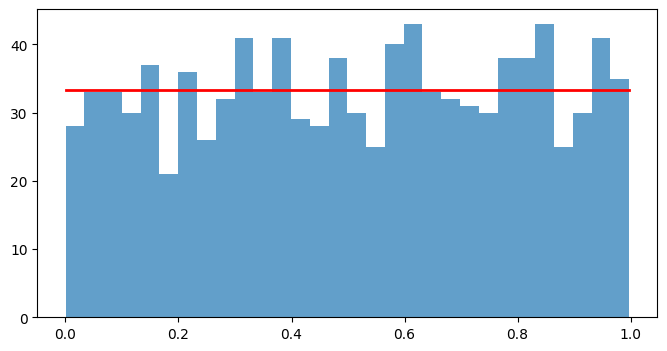

In [26]:
# 创建长度为 1000 的随机数组
a = np.random.rand(1000)

plt.figure(figsize=(8, 4))

# 绘制直方图, 按 30 个块分组, 显示各随机数出现的频率
count, bins, _ = plt.hist(a, bins=30, alpha=0.7)

# 绘制平均频率线
plt.plot(bins, np.mean(count) * np.ones_like(bins), color="r", linewidth=2)
plt.show()

当函数传递一个以上参数时, 表示创建多维数组, 参数即数组的形状

In [27]:
# 创建形状为 3 x 4 x 5 的随机数数组
a = np.random.rand(2, 3, 4)

print(f"创建多维数组:\n{a}, shape={a.shape}")

创建多维数组:
[[[0.73068635 0.70787706 0.92847697 0.18880769]
  [0.66125481 0.93928301 0.1375361  0.04949012]
  [0.61558649 0.58834818 0.26151365 0.42833098]]

 [[0.77480029 0.08921634 0.99719103 0.04439242]
  [0.9974077  0.8102641  0.42035019 0.42940699]
  [0.13953931 0.73297024 0.22989781 0.17422688]]], shape=(2, 3, 4)


无法直接通过 `np.random.rand` 函数创建元素为指定范围内随机数的数组, 但可以通过如下公式创建元素值在 $min$ 和 $max$ 范围内随机数的数组: $min + (max - min) \times R_{[0, 1)}$

In [28]:
# 指定随机数的最小值和最大值
min_, max_ = 5, 10

# 先生成元素值为 0 到 1 的随机数的数组
a = np.random.rand(2, 3, 4)

# 通过公式, 将 0 到 1 随机数扩展到指定范围的随机数
b = min_ + (max_ - min_) * a
print(f"数组内容:\n{b}, shape={a.shape}")

数组内容:
[[[6.26162275 9.76044194 5.06416031 6.56082868]
  [7.95402273 6.27253053 8.22750115 6.62980912]
  [5.77852383 9.20975331 7.28798057 6.17413298]]

 [[6.59371557 7.45175575 9.56981998 5.13915095]
  [9.42020303 8.17713872 9.90985261 6.41022793]
  [6.55011423 5.10905584 5.8017006  6.11892586]]], shape=(2, 3, 4)


##### 5.3.1.2. 随机整数数组

通过 `np.random.randint` 函数可以创建元素值为随机整数值的数组, 且可以通过 `low` 和 `high` 参数指定随机数的范围, 函数将创建元素值在 `[low, high)` 范围内的随机数组, 通过 `size` 参数指定数组的形状

该函数创建的随机数数组元素为均匀分布

当 `size` 参数为一个整数时, 结果为一维数组, `size` 参数的那一项表示数组长度

In [29]:
# 定义随机数范围, 即最小值和最大值
low, high = 1, 10

# 创建元素值为 [1, 10) 范围内随机数的一维数组, 长度为 10
a = np.random.randint(low=low, high=high, size=10)

print(f"数组内容: {a}, shape={a.shape}")

数组内容: [1 8 2 8 8 1 9 1 5 9], shape=(10,)


绘制随机数分布散点图

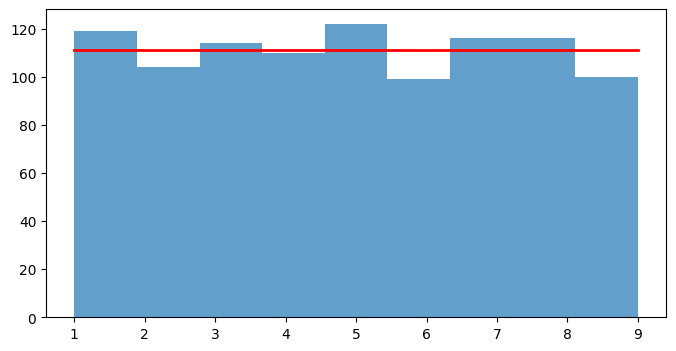

In [30]:
# 定义随机数范围, 即最小值和最大值
low, high = 1, 10

# 创建元素值为 [1, 10) 范围内随机数的一维数组, 长度为 1000
a = np.random.randint(low=low, high=high, size=1000)

plt.figure(figsize=(8, 4))

# 绘制直方图, 按 high - low 个块分组, 显示各随机数出现的频率
# 因为随机数值是整数, 不连续, 故分组数量不能大于随机数包含的整数值个数, 本例一共包含 9 个整数值
count, bins, _ = plt.hist(a, bins=high - low, alpha=0.7)

# 绘制平均频率线
plt.plot(bins, np.mean(count) * np.ones_like(bins), color="r", linewidth=2)
plt.show()

当 `size` 参数为一个长度大于 `1` 的元组时, 表示创建多维数组, `size` 参数为数组的形状

In [31]:
# 创建元素值为 [1, 10) 范围内随机数的多维数组, 形状为 2 x 3 x 4
a = np.random.randint(1, 10, size=(2, 3, 4))

print(f"数组内容:\n{a}, shape={a.shape}")

数组内容:
[[[7 2 6 1]
  [2 1 2 4]
  [4 1 4 2]]

 [[6 9 6 4]
  [8 8 5 8]
  [6 1 9 9]]], shape=(2, 3, 4)


##### 5.3.1.3. 指定均匀分布范围

通过 `np.random.uniform` 函数可以创建指定元素数量的一维数组, 数组元素在指定范围内随机产生, 并均匀分布

该函数产生在指定范围内的随机浮点数

In [32]:
# 定义随机数范围, 即最小值和最大值
low, high = 1, 20

# 产生一个 20 个元素的一维数组, 数组元素在 [1, 20) 范围内随机产生
a = np.random.uniform(low=low, high=high, size=20)

print(f"数组内容: {a}, shape={a.shape}")

数组内容: [16.22068912 15.67588998  8.6424955  17.01394156  1.91061983 18.08805599
 11.60385857  5.16545918 16.12094716 14.39272649  2.87146952 11.76559871
  7.19901947 19.48600172 12.68641481 13.39903492 19.49560545  4.54667438
  4.30621496  8.9404176 ], shape=(20,)


绘制随机数分布散点图

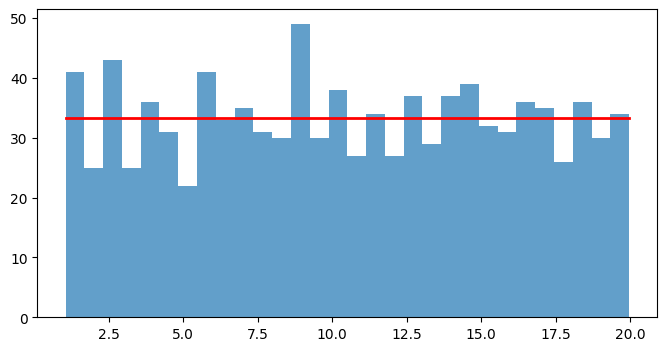

In [33]:
# 定义随机数范围, 即最小值和最大值
low, high = 1, 20

# 产生一个 1000 个元素的一维数组, 数组元素在 [1, 20) 范围内随机产生
a = np.random.uniform(low=low, high=high, size=1000)

plt.figure(figsize=(8, 4))

# 绘制直方图, 按 30 个块分组, 显示各随机数出现的频率
count, bins, _ = plt.hist(a, bins=30, alpha=0.7)

# 绘制平均频率线
plt.plot(bins, np.mean(count) * np.ones_like(bins), color="r", linewidth=2)
plt.show()

当 `size` 参数为一个长度大于 `1` 的元组时, 表示创建多维数组, `size` 参数为数组的形状

In [34]:
# 产生一个形状为 2 x 3 x 4 的多维数组, 数组元素在 [1, 20) 范围内随机产生
a = np.random.uniform(1, 20, size=(2, 3, 4))

print(f"数组内容:\n{a}, shape={a.shape}")

数组内容:
[[[ 1.24777153  5.31645477 19.7948033  17.15443357]
  [ 5.80128088 18.58132371 12.85527832  9.09452621]
  [ 3.92732101 19.97339031 15.21317786 15.20100161]]

 [[10.15822246 19.22738065  5.7049702   4.53020551]
  [ 5.28169653 10.9392155  19.67058518 14.12464116]
  [ 5.32787037 10.47623567 13.14990148 14.20036225]]], shape=(2, 3, 4)


#### 5.3.2. 正态分布数组

In [35]:
# 定义正态分布的均值和标准差
mu, sigma = 1.0, 2.0

# 创建长度为 10 的随机数组, 另均值为 1.0, 标准差为 2.0
a = np.random.normal(loc=mu, scale=sigma, size=10)

print(f"数组内容:\n{a}, shape={a.shape}")

数组内容:
[2.4744349  1.37910334 2.11353185 3.00349412 5.39268592 0.73799546
 3.95833336 2.16054653 1.73070141 1.97867436], shape=(10,)


绘制随机数分布散点图

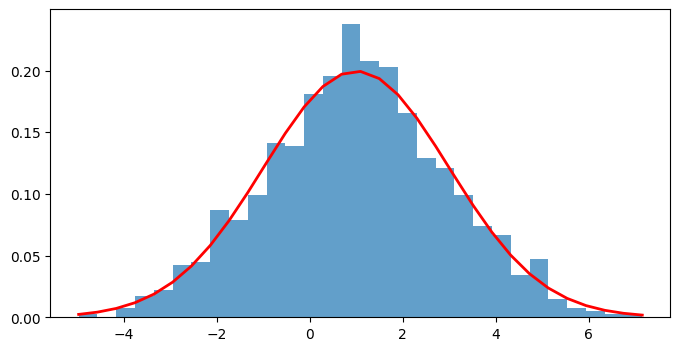

In [36]:
from utils import univariate_norm


# 定义正态分布的均值和标准差
mu, sigma = 1.0, 2.0

# 创建长度为 1000 的随机数组, 另均值为 1.0, 标准差为 2.0
a = np.random.normal(loc=mu, scale=sigma, size=1000)

plt.figure(figsize=(8, 4))

# 绘制直方图, 按 30 个块分组, 显示各随机数出现的频率
count, bins, _ = plt.hist(a, bins=30, density=True, alpha=0.7)

# 绘制正态分布曲线
plt.plot(bins, univariate_norm(bins, mu=mu, sigma=sigma), linewidth=2, color="r")
plt.show()

当 `size` 参数为一个长度大于 `1` 的元组时, 表示创建多维数组, `size` 参数为数组的形状

In [37]:
# 创建长度为 10 的随机数组, 另均值为 1.0, 标准差为 2.0
a = np.random.normal(loc=1.0, scale=2.0, size=(2, 3, 4))

print(f"数组内容:\n{a}, shape={a.shape}")

数组内容:
[[[ 2.2930341   2.51217844  0.14636277  3.59485175]
  [ 1.23665145 -0.04978356  1.29789734  3.63363957]
  [ 0.62049146  2.13408022 -3.09169043  3.11008335]]

 [[-0.24701007 -3.19160062  4.37740541  2.5259823 ]
  [-2.42550986 -1.24395539  1.45984522  0.79881187]
  [ 0.02619353  1.57873055  2.08846113 -0.43811803]]], shape=(2, 3, 4)


## 6. 数组存储方式

Numpy 数组在内存中为连续存储, 支持两种内存布局模式, 包括 "C" 风格的按行元素存储 (行主序) 和 "Fortran" 风格按列元素存储 (列主序)

通过创建数组时指定 `order` 参数, 可以改变数组的存储顺序, 参数值包括:

- `"A"`: 默认, 创建时根据数组的形状自动选择
- `"C"`: "C" 风格按行存储 (行主序)
- `"F"`: "Fortran" 风格按列存储 (列主序)
- `"K"`: 保持原数组的存储顺序

### 8.1. 创建 C 风格存储的数组 (行主序)

In [38]:
a = np.array(
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ],
    order="C",
)
print(f"数组内容:\n{a}, \n元素存储顺序:\n{[int(n) for n in np.nditer(a)]}")  # type: ignore

数组内容:
[[1 2 3]
 [4 5 6]
 [7 8 9]], 
元素存储顺序:
[1, 2, 3, 4, 5, 6, 7, 8, 9]


### 8.2. 创建 Fortran 风格存储的数组 (列主序)

In [39]:
a = np.array(
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ],
    order="F",
)
print(f"数组内容:\n{a}, \n元素存储顺序:\n{[int(n) for n in np.nditer(a)]}")  # type: ignore

数组内容:
[[1 2 3]
 [4 5 6]
 [7 8 9]], 
元素存储顺序:
[1, 4, 7, 2, 5, 8, 3, 6, 9]
